<a href="https://colab.research.google.com/github/pritul2/ML_practice/blob/master/Visualize_Intermediate_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stanford Car Dataset Size: (192, 256, 3)

In [49]:
!wget http://imagenet.stanford.edu/internal/car196/cars_train.tgz

--2021-04-23 11:43:47--  http://imagenet.stanford.edu/internal/car196/cars_train.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  7.07MB/s    in 2m 59s  

2021-04-23 11:46:46 (5.21 MB/s) - ‘cars_train.tgz’ saved [979269282/979269282]



In [51]:
!gunzip /content/cars_train.tgz

In [52]:
!tar -xvf /content/cars_train.tar

Streaming output truncated to the last 5000 lines.
cars_train/03145.jpg
cars_train/03146.jpg
cars_train/03147.jpg
cars_train/03148.jpg
cars_train/03149.jpg
cars_train/03150.jpg
cars_train/03151.jpg
cars_train/03152.jpg
cars_train/03153.jpg
cars_train/03154.jpg
cars_train/03155.jpg
cars_train/03156.jpg
cars_train/03157.jpg
cars_train/03158.jpg
cars_train/03159.jpg
cars_train/03160.jpg
cars_train/03161.jpg
cars_train/03162.jpg
cars_train/03163.jpg
cars_train/03164.jpg
cars_train/03165.jpg
cars_train/03166.jpg
cars_train/03167.jpg
cars_train/03168.jpg
cars_train/03169.jpg
cars_train/03170.jpg
cars_train/03171.jpg
cars_train/03172.jpg
cars_train/03173.jpg
cars_train/03174.jpg
cars_train/03175.jpg
cars_train/03176.jpg
cars_train/03177.jpg
cars_train/03178.jpg
cars_train/03179.jpg
cars_train/03180.jpg
cars_train/03181.jpg
cars_train/03182.jpg
cars_train/03183.jpg
cars_train/03184.jpg
cars_train/03185.jpg
cars_train/03186.jpg
cars_train/03187.jpg
cars_train/03188.jpg
cars_train/03189.jpg
cars

## Loading VGG16 Model

In [20]:
# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
vgg = VGG16()
# summarize the model
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Reading RGB Image and resize for (224,224,3)

Original size (192, 256, 3)
(1, 224, 224, 3)


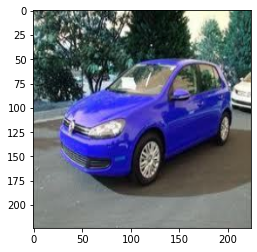

In [167]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img_path = 'cars_train/08088.jpg'
img_tensor = cv2.imread('cars_train/08088.jpg')
print("Original size",img_tensor.shape)
img_tensor = cv2.resize(img_tensor,(224,224))
img_tensor = np.expand_dims(img_tensor, axis=0)
print(img_tensor.shape)
plt.imshow(img_tensor[0])

## Preparing Model for prediction

In [162]:
layer_outputs = [layer.output for layer in vgg.layers[1:19]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=vgg.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [163]:
activations = activation_model.predict(img_tensor)
len(activations)

18

## Final Output from block1_conv1

layer  1   block1_conv1
(1, 224, 224, 64)


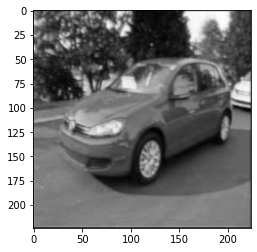

layer  2   block1_conv2
(1, 112, 112, 64)


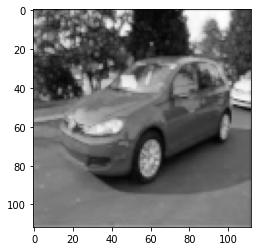

layer  3   block1_pool
(1, 112, 112, 128)


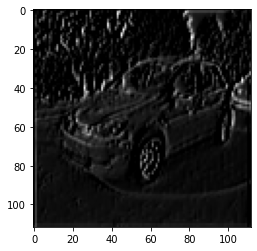

layer  4   block2_conv1
(1, 112, 112, 128)


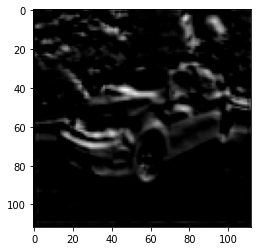

layer  5   block2_conv2
(1, 56, 56, 128)


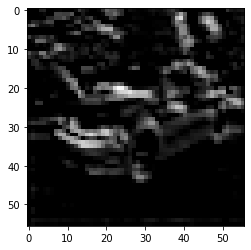

layer  6   block2_pool
(1, 56, 56, 256)


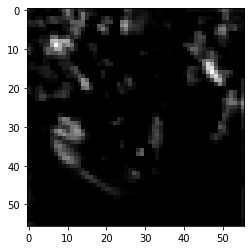

layer  7   block3_conv1
(1, 56, 56, 256)


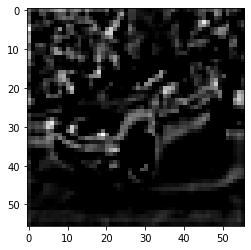

layer  8   block3_conv2
(1, 56, 56, 256)


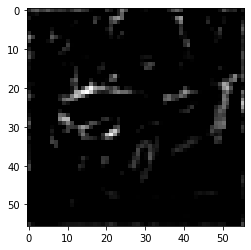

layer  9   block3_conv3
(1, 28, 28, 256)


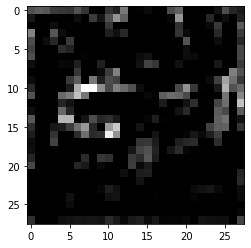

layer  10   block3_pool
(1, 28, 28, 512)


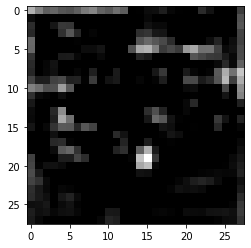

layer  11   block4_conv1
(1, 28, 28, 512)


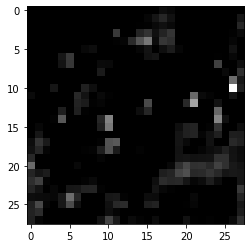

layer  12   block4_conv2
(1, 28, 28, 512)


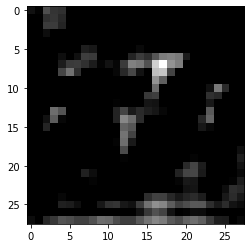

layer  13   block4_conv3
(1, 14, 14, 512)


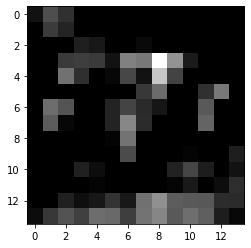

layer  14   block4_pool
(1, 14, 14, 512)


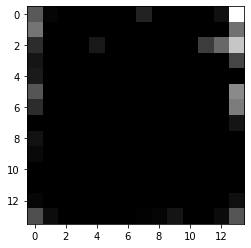

layer  15   block5_conv1
(1, 14, 14, 512)


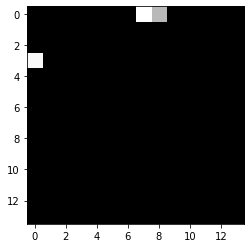

layer  16   block5_conv2
(1, 14, 14, 512)


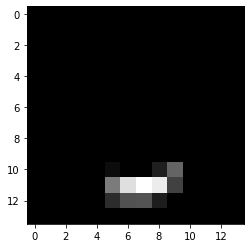

In [164]:
for i in range(1,18-1):
  first_layer_activation = activations[i]
  print("layer ",i," ",vgg.layers[i].name)
  print(first_layer_activation.shape)
  plt.imshow(first_layer_activation[0, :, :, 4],cmap='gray')
  plt.show()

## First 64 Filters output of each layer

layer  1   block1_conv1


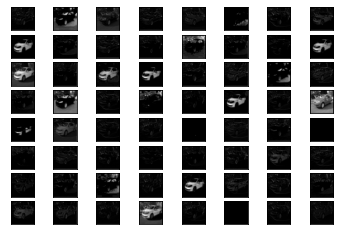

layer  2   block1_conv2


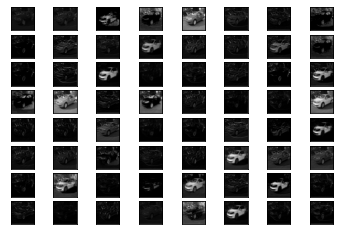

layer  3   block1_pool


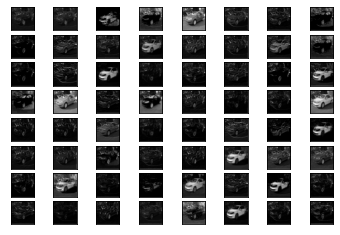

layer  4   block2_conv1


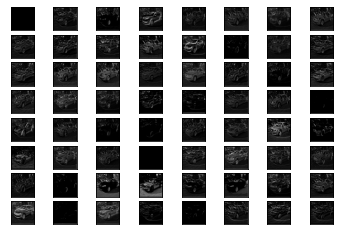

layer  5   block2_conv2


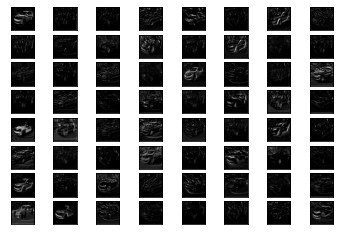

layer  6   block2_pool


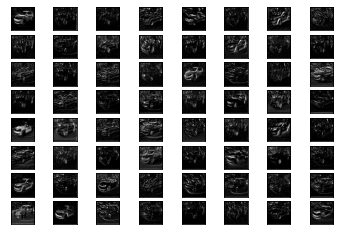

layer  7   block3_conv1


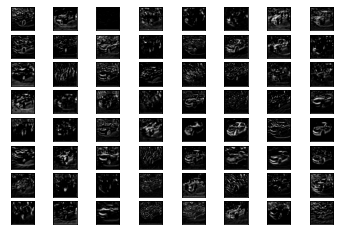

layer  8   block3_conv2


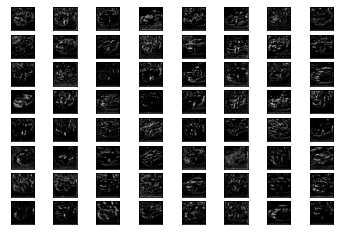

layer  9   block3_conv3


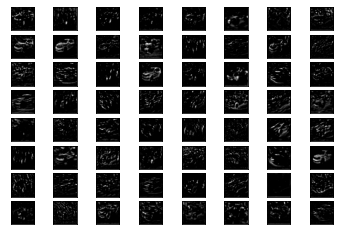

layer  10   block3_pool


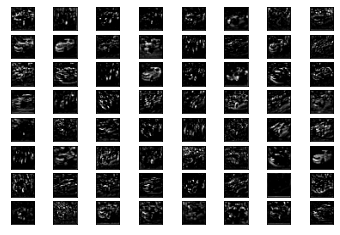

layer  11   block4_conv1


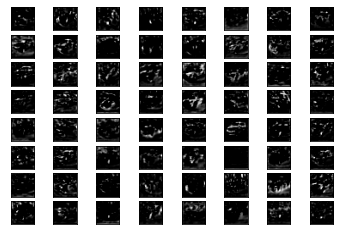

layer  12   block4_conv2


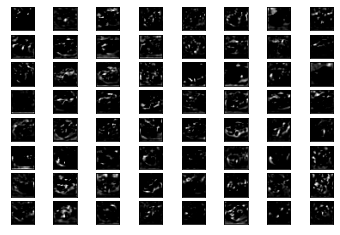

layer  13   block4_conv3


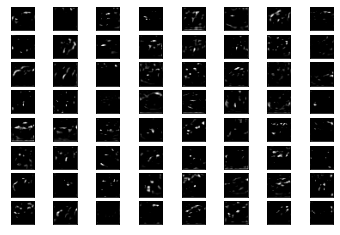

layer  14   block4_pool


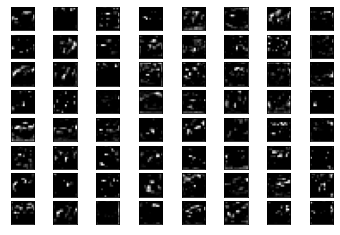

layer  15   block5_conv1


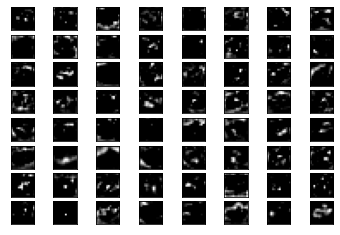

layer  16   block5_conv2


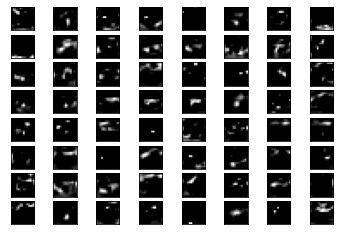

layer  17   block5_conv3


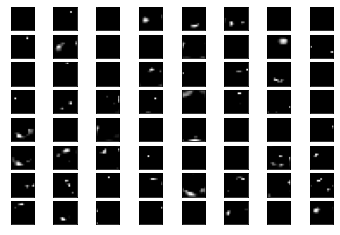

layer  18   block5_pool


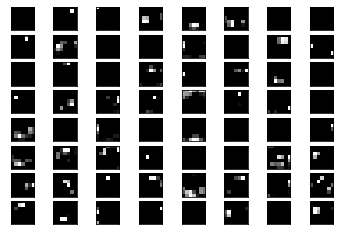

In [165]:
from matplotlib import pyplot
feature_maps = activation_model.predict(img_tensor)
# plot the output from each block
square = 8
i=1
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	print("layer ",i," ",vgg.layers[i].name)
	#print(first_layer_activation.shape)
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()
	i+=1